In [1]:
import pandas as pd
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
data = pd.read_csv('moons.csv')
data['cluster'] = 0

data.head()

,Xmoons_X1,Xmoons_X2,cluster
0,-0.378142,0.940750,0
1,0.933566,0.153805,0
2,2.048309,0.498172,0
3,0.947891,0.162473,0
4,2.000739,0.183700,0


<AxesSubplot:xlabel='Xmoons_X1', ylabel='Xmoons_X2'>

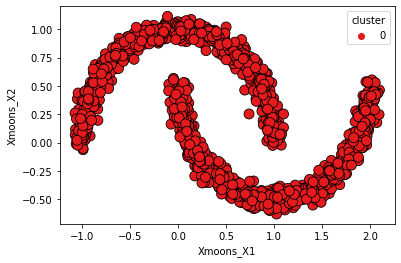

In [4]:
sns.scatterplot(x='Xmoons_X1', y='Xmoons_X2', hue='cluster', data=data, palette='Set1', marker='o', s=100, edgecolor='k')

In [5]:
class DBScanCustom:
    def __init__(self,minPts,epsilon):
        self.minPts = minPts
        self.epsilon = epsilon
        self.labels = None
        
    def distance(self,p1,p2):
        return math.sqrt(sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))))
    
    def findNeighbors(self,dataset,currIdx):
        neighbors = []
        
        for idx,otherPoint in enumerate(dataset):
            if self.distance(dataset[currIdx],otherPoint) <= self.epsilon:
                neighbors.append(idx)
                
        return neighbors
    
    def expand(self,dataset,currIdx,clusterId):
        self.labels[currIdx] = clusterId
        queue = deque([currIdx])
        
        while queue:
            currPoint = queue.popleft()
            neighbors = self.findNeighbors(dataset,currPoint)
            
            if len(neighbors)>=self.minPts:
                for neighbor in neighbors:
                    if self.labels[neighbor] == -1:
                        self.labels[neighbor] = clusterId
                    elif self.labels[neighbor] == 0:
                        self.labels[neighbor] = clusterId
                        queue.append(neighbor)
    
    def runDBSCAN(self,dataset):
        
        self.labels = [0]*len(dataset)
        startClusterId = 0
        
        for i in range(len(dataset)):
            if self.labels[i]!=0:
                continue
            
            neighbors = self.findNeighbors(dataset,i) 
            if len(neighbors) < self.minPts:
                self.labels[i] = -1
            else:
                startClusterId += 1
                self.expand(dataset,i,startClusterId)
                    
        return self.labels
        
    

In [6]:
def run_dbscan_and_plot(data, epsilon, minPts):
    dataPoints = data[['Xmoons_X1','Xmoons_X2']].values
    dbscan = DBScanCustom(epsilon=epsilon, minPts=minPts)
    labels = dbscan.runDBSCAN(dataPoints)
    data['cluster'] = labels
    
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=data, x='Xmoons_X1', y='Xmoons_X2', hue='cluster', palette='Set1', marker='o', s=100, edgecolor='k', legend="full")
    sns.scatterplot(data=data[data['cluster'] == -1], x='Xmoons_X1', y='Xmoons_X2', color='black', label='Noise', marker='x', s=100)
    plt.title(f"DBSCAN Clustering (ε={epsilon}, MinPts={minPts})")
    plt.show()
    


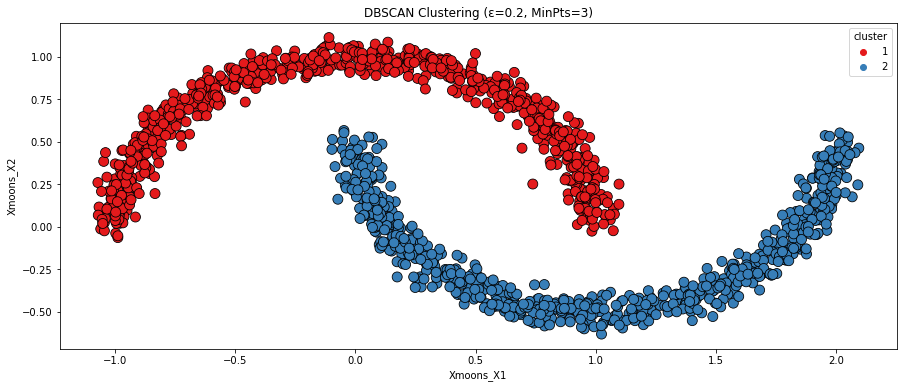

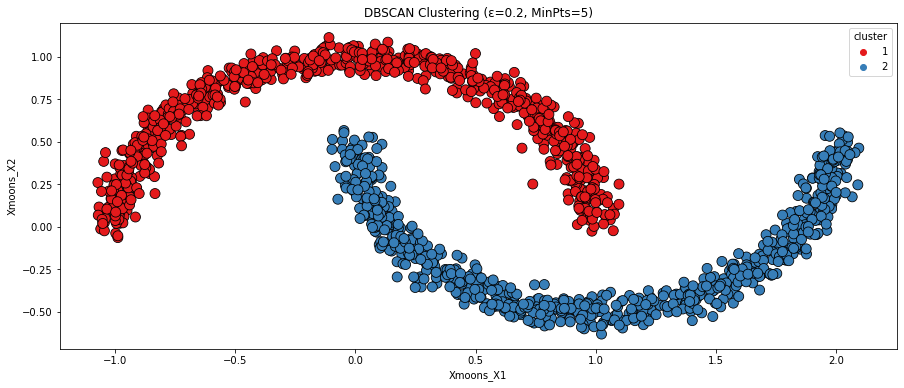

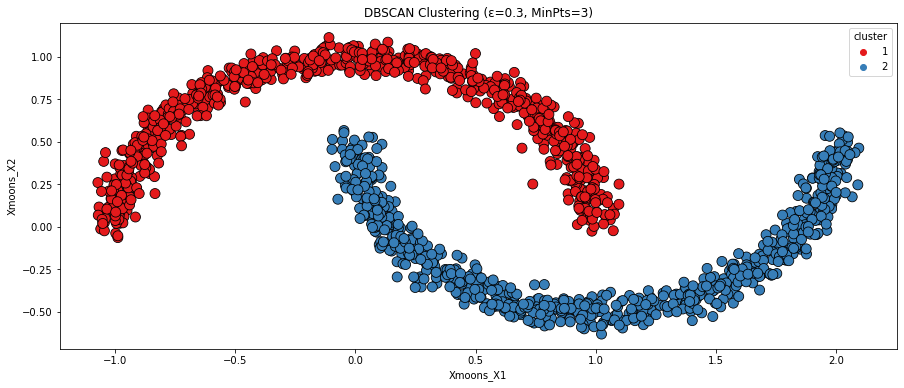

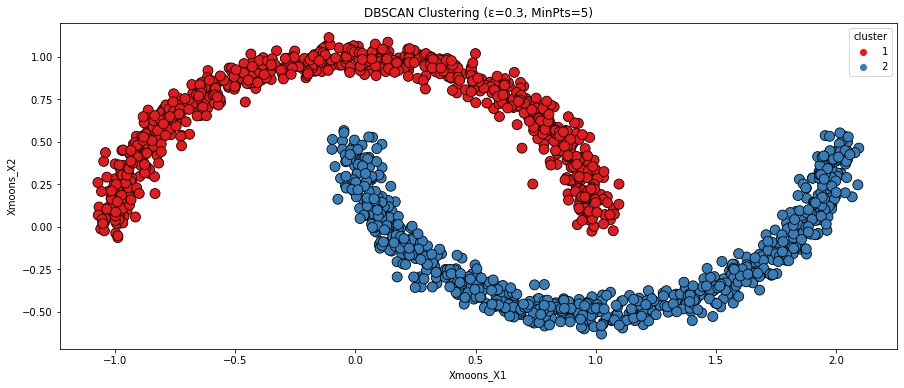

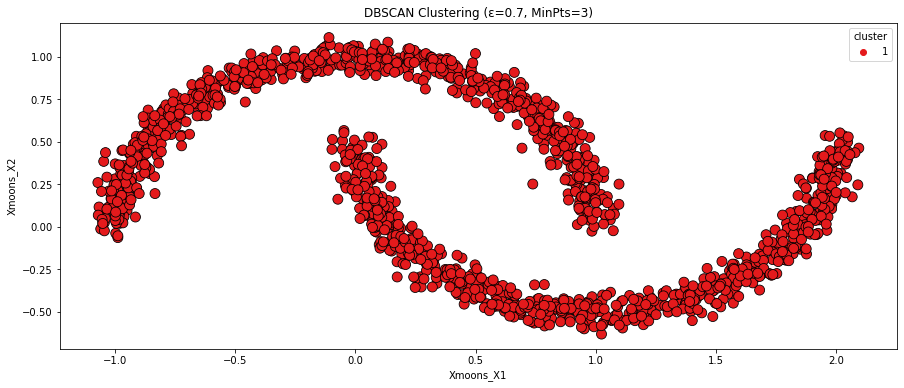

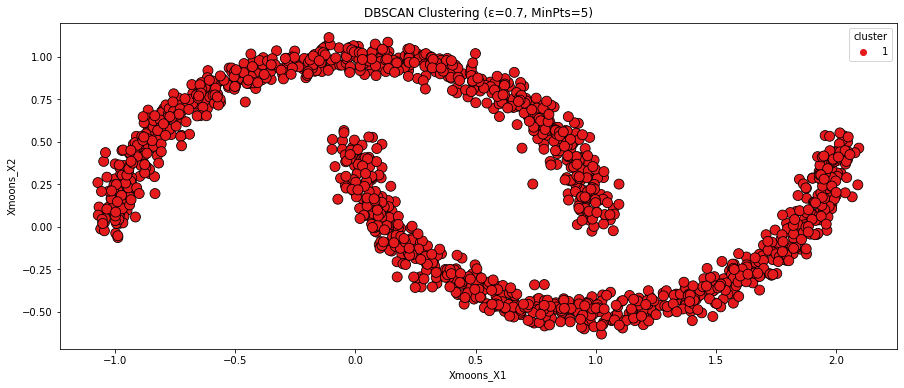

In [7]:
epsilon_values = [0.2, 0.3, 0.7]
minPts_values = [3,5]

for epsilon in epsilon_values:
    for minPts in minPts_values:
        run_dbscan_and_plot(data, epsilon, minPts)
